In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
from numpy.fft import fft, ifft, fftfreq, fftshift
from scipy.integrate import simps
from scipy.interpolate import interp1d
from scipy.special import erf
from beam.beams import laserpulse
from beam.beams import laserbeam
from beam.elements import plasma
from beam.elements import optic
from beam import interactions
from propagation import laser
from ionization import ionization
from lens import profile
from lens import bessel
from lens import ray
import matplotlib.pyplot as plt
from lens import design
plt.style.use('notes')

lam = 0.796
# All length units are in um

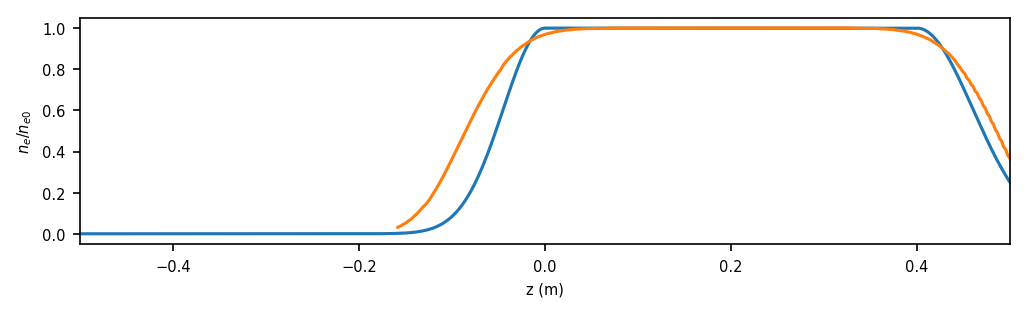

In [2]:
# Gaussian ramps?
# Load the gas density from the CSV file
li_data = np.genfromtxt("/home/robert/Dropbox/Research/Notes/Lithium_Oven_Density.csv", delimiter=',')
Nz = 2**16
Z = 2e6
z, dz = np.linspace(-1e6, Z, Nz, retstep=True)
n = np.zeros(Nz, dtype='double')
ne0 = 3.4e16/1e17
xlim = [-0.5, 0.5]

# Uniform accelerating plasma
length = 40e4
z0 = 0 # start of the uniform plasma
sel_u = np.logical_and(z > z0, z < z0+length)
n[sel_u] = 1.0

# Entrance ramp
l_ent = 50e4 # length of the entrance ramp
s_ent = 4.5e4
sel_ent = np.logical_and(z >= z0-l_ent, z <= z0)
ramp_ent = np.exp(-(z-z0)**2/(2*s_ent**2))
n[sel_ent] = ramp_ent[sel_ent]

#Exit ramp
l_ext = 20e4 # length of the entrance ramp
s_ext = 6e4
sel_ext = np.logical_and(z >= z0+length, z <= z0+length+l_ext)
ramp_ext = np.exp(-(z-z0-length)**2/(2*s_ext**2))
n[sel_ext] = ramp_ext[sel_ext]

plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, n)
plt.plot((li_data[:, 0]-19)/100, li_data[:, 1])
plt.xlabel(r'z (m)')
plt.ylabel(r'$n_e/n_{e0}$')
plt.xlim(xlim)
plt.show()

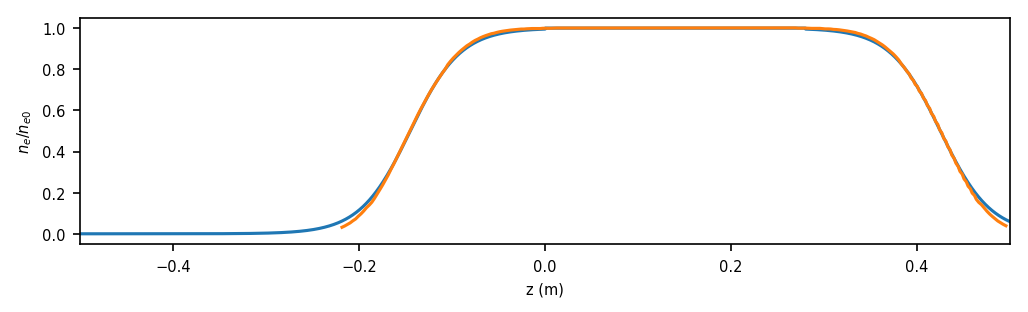

In [3]:
# Logisitic Ramps?
# Uniform accelerating plasma
length = 28e4
z0 = 0 # start of the uniform plasma
sel_u = np.logical_and(z > z0, z < z0+length)
n[sel_u] = 1.0

# Entrance ramp
l_ent = 50e4 # length of the entrance ramp
s_ent = 2.7e4
sel_ent = np.logical_and(z >= z0-l_ent, z <= z0)
ramp_ent = 1/(1+np.exp(-(z-z0+14.5e4)/(s_ent)))
n[sel_ent] = ramp_ent[sel_ent]

#Exit ramp
l_ext = 50e4 # length of the entrance ramp
s_ext = 2.7e4
sel_ext = np.logical_and(z >= z0+length, z <= z0+length+l_ext)
ramp_ext = 1/(1+np.exp((z-z0-14.5e4-length)/(s_ent)))
n[sel_ext] = ramp_ext[sel_ext]

plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, n)
plt.plot((li_data[:, 0]-25)/100, li_data[:, 1])
plt.xlabel(r'z (m)')
plt.ylabel(r'$n_e/n_{e0}$')
plt.xlim(xlim)
plt.show()

In [ ]:
# Uniform accelerating plasma
length = 30e4
z0 = 0 # start of the uniform plasma
sel_u = np.logical_and(z > z0, z < z0+length)
n[sel_u] = 1.0

# Entrance ramp
l_ent = 50e4 # length of the entrance ramp
s_ent = 12e4
sel_ent = np.logical_and(z >= z0-l_ent, z <= z0)
ramp_ent = 1/(1+((z-z0)/(s_ent))**4)
n[sel_ent] = ramp_ent[sel_ent]

#Exit ramp
l_ext = 50e4 # length of the entrance ramp
s_ext = 2.7e4
sel_ext = np.logical_and(z >= z0+length, z <= z0+length+l_ext)
ramp_ext = 1/(1+np.exp((z-z0-14.5e4-length)/(s_ent)))
n[sel_ext] = ramp_ext[sel_ext]

plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, n)
plt.plot((li_data[:, 0]-23)/100, li_data[:, 1])
plt.xlabel(r'z (m)')
plt.ylabel(r'$n_e/n_{e0}$')
plt.xlim(xlim)
plt.show()

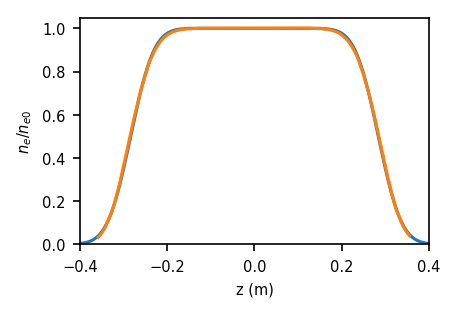

In [67]:
# Error function ramps?
# Uniform accelerating plasma
length = 30.8e4
z0 = -length/2 # start of the uniform plasma
sel_u = np.logical_and(z > z0, z < z0+length)
n[sel_u] = 1.0

# Entrance ramp
l_ent = 40e4-length/2 # length of the entrance ramp
s_ent = 4.2e4
sel_ent = np.logical_and(z >= z0-l_ent, z <= z0)
ramp_ent = 0.5*(1+erf((z-z0+13e4)/(np.sqrt(2)*s_ent)))
n[sel_ent] = ramp_ent[sel_ent]

#Exit ramp
l_ext = 40e4-length/2 # length of the entrance ramp
s_ext = 4.2e4
sel_ext = np.logical_and(z >= z0+length, z <= z0+length+l_ext)
ramp_ext = 0.5*(1+erf(-(z-z0-13e4-length)/(np.sqrt(2)*s_ent)))
n[sel_ext] = ramp_ext[sel_ext]

xlim = [-0.4, 0.4]
plt.figure(figsize=(3, 2), dpi=150)
plt.plot(z/1e6, n)
plt.plot((li_data[:, 0]-39)/100, li_data[:, 1])
plt.xlabel(r'z (m)')
plt.ylabel(r'$n_e/n_{e0}$')
plt.xlim(xlim)
plt.ylim(0, 1.05)
plt.show()